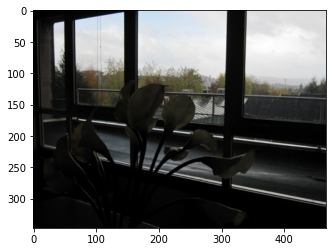

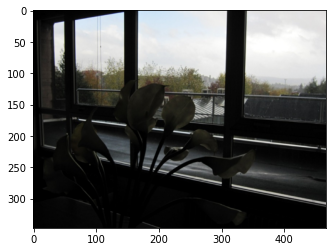

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def scb(img):
    pagesize=img.shape[0]*img.shape[1]

    flat_img=img.flatten()
    sort_flat_img=sorted(flat_img)
    s=np.exp(0.2)
    s1=s/2
    s2=s1
    
    pos_v_min=int(pagesize*s1/100)
    pos_v_max=int((pagesize * (1 - (s2/100))) - 1)
    
    v_min=sort_flat_img[pos_v_min]
    v_max=sort_flat_img[pos_v_max]
    
    idx_min=flat_img<v_min
    idx_max=flat_img>v_max
    
    flat_img[idx_min]=v_min
    flat_img[idx_max]=v_max
    for i in range(pagesize):
        flat_img[i]=(flat_img[i]-v_min)*255/(v_max-v_min)
    output=np.reshape(flat_img,img.shape)
    return output

img=cv2.imread('input_1.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

b,g,r=cv2.split(img)
b_out=scb(b)
g_out=scb(g)
r_out=scb(r)

output=cv2.merge([b_out,g_out,r_out])
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.show()